**PySDS Week 02 Day 01 v.1 - Exercise - Manging DataFrames**

In [8]:
# Recall the small table from week 1. Here it is again. 

MuppetInput = '''
Name	Gender	Species	First Appearance
Fozzie	Male	Bear	1976
Kermit	Male	Frog	1955
Piggy	Female	Pig	1974
Gonzo	Male	Unknown	1970
Rowlf	Male	Dog	1962
Beaker	Male	Muppet	1977
Janice	Female	Muppet	1975
Hilda	Female	Muppet	1976
'''

# Step 1. 
# This time please convert it into a DataFrame 

# Step 2. Please answer the following questions using the DataFrame:

# A. What are the details for Fozzie Bear
# - Return these printed in a sentence of the form
# - <Name> is a <gender> <species> who first appeared in <date>

# B. Who appeared before 1976 (i.e. the year the Muppet Show started).
# Return this as a DataFrame. 

# Step 3 . Adding a row of data
# Please add a row for 
# "Rizzo"  a male rat who first appeared in 1980. 

# Answer 
#1
import pandas as pd
listsdata = [x.split('\t') for x in MuppetInput.strip().split('\n')] # use a list comprehension to generate list of lists for data to import

df = pd.DataFrame(listsdata[1:], columns=listsdata[0], dtype=object) # read list of lists

df['First Appearance'] = df['First Appearance'].astype('int64') # this line is needed with this approach, as pandas initially treated the values in col as strings

# or pd.read_csv('...', index_col=0) if you have the csv saved from last week

#2
print('%s is a %s %s who first appeared in %s'  # accessing the values using .loc, plus some tidying of strings to make grammatical sense
      %(df.loc[0, "Name"], df.loc[0, "Gender"].lower(), df.loc[0, "Species"].lower(), df.loc[0, "First Appearance"]))

# alternatively, use df.set_index("Name") to set the names as the index, then query with df.loc['Fozzie', 'Gender']...

display(df[df["First Appearance"]<1976]) # show the df of muppets whose first appearance was before 1976

desc = '"Rizzo"  a male rat who first appeared in 1980.' # get data from sentence (probably overkill)
desclist = desc.split() # split into list then put into dict for appending to df
r_data = {'Name':desclist[0][1:-1], # tidy up to remove punctuation and to capitalise
          'Gender':desclist[2].capitalize(),
          'Species':desclist[3].capitalize(),
          'First Appearance':desclist[-1][:-1]}

df = df.append(r_data, ignore_index=True) # append to df
display(df)


# Reviewer's comments


Fozzie is a male bear who first appeared in 1976


,Name,Gender,Species,First Appearance
1,Kermit,Male,Frog,1955
2,Piggy,Female,Pig,1974
3,Gonzo,Male,Unknown,1970
4,Rowlf,Male,Dog,1962
6,Janice,Female,Muppet,1975


,Name,Gender,Species,First Appearance
0,Fozzie,Male,Bear,1976
1,Kermit,Male,Frog,1955
2,Piggy,Female,Pig,1974
3,Gonzo,Male,Unknown,1970
4,Rowlf,Male,Dog,1962
5,Beaker,Male,Muppet,1977
6,Janice,Female,Muppet,1975
7,Hilda,Female,Muppet,1976
8,Rizzo,Male,Rat,1980


In [9]:
# Creating a DataFrame of Muppet show episodes by season.
# * Note, there is a fifth season of the muppets which was not included.
#   This will be addressed next week.
#
# Step 1. 
#
# Using the text from the previous week contained within 
#  muppet_episodes_by_season.zip
# unzip the files (that can be done manually), read each one of them
# in as a DataFrame, then marge the dataframes to have a single 
# dataframe. 


# Step 2. 
#
# Did any of the guest stars appear more than once? 
# Did every season have the same number of episodes? 


# Answer 
#1
filepath = 'muppet_episodes_by_season.zip/' # edit as necessary

# store the separate season dfs in a dict
season_dfs = {i:pd.read_csv(filepath+'muppet_show_season_%d.txt' %i, index_col=0) for i in range(1,5)} # use a dict comprehension to import
    
ep_df = pd.concat(season_dfs.values()) # concatenate the dict values (each season's df) into one df
display(ep_df)

#2
more_than_once = ep_df['episodeName'].value_counts()[ep_df['episodeName'].value_counts()>1] # get the guest names that have appeared more than once
print('%d guests appeared more than once' %len(more_than_once))

display(ep_df['airedSeason'].value_counts()) # display value counts for the no. of episodes in each season
# all seasons have the same episode count

# Reviewer's comments



,episodeName,airedEpisodeNumber,airedSeason
0,Juliet Prowse,24,1
1,Connie Stevens,22,1
2,Joel Grey,5,1
3,Ruth Buzzi,4,1
4,Rita Moreno,3,1
5,Jim Nabors,1,1
6,Florence Henderson,9,1
7,Paul Williams,6,1
8,Charles Aznavour,15,1
9,Harvey Korman,13,1


0 guests appeared more than once


4    24
3    24
2    24
1    24
Name: airedSeason, dtype: int64

In [11]:
# Working with a column of data 

# Using the table of data above split the guest stars name 
# so that the first name is in its own column. 
# Find and print the name of the guest star with the longest first name. 
# Print it in a sentence that also includes the guest star's episode number.

# Bonus! Now recall that we were looking for first name, not a group name
# So in your answer, split the text. 
# If the entry has more or less than two entries, discard it.
# Does this make a difference? 

# Answer
# gets the string of the value in the episode name column, splits it, (has to fetch the string again), then gets the 0th element - or the first name
ep_df['firstName'] = ep_df['episodeName'].str.split().str[0]

# gets the firstname string, gets the length, gets the index of the string with the max length, returns the name / episode name
guest_name = ep_df['episodeName'].loc[ep_df['firstName'].str.len().idxmax()]
ep_num = ep_df['airedEpisodeNumber'].loc[ep_df['firstName'].str.len().idxmax()]
print('The guest with the longest first name is %s, and they appeared in episode number %d.' %(guest_name, ep_num))

# Hmmm this is not the expected answer...

# assume that entries with 2 words as the guest name refer to individual people
# and that entries with more or less than 2 words refer to bands / groups of people
fsname_df = ep_df[ep_df['episodeName'].str.split().str.len()==2]

# gets the firstname string, gets the length, gets the index of the string with the max length, returns the name / episode name
guest_name = fsname_df['episodeName'].loc[fsname_df['firstName'].str.len().idxmax()]
ep_num = fsname_df['airedEpisodeNumber'].loc[fsname_df['firstName'].str.len().idxmax()]
print('The guest with the longest first name is %s, and they appeared in episode number %d.' 
      %(guest_name, ep_num))

# Reviewer's comments

The guest with the longest first name is Mummenschanz, and they appeared in episode number 14.
The guest with the longest first name is Christopher Reeve, and they appeared in episode number 14.


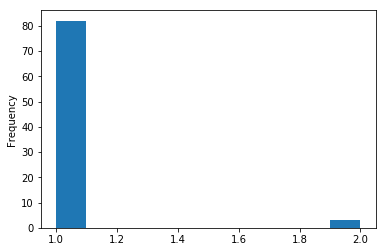

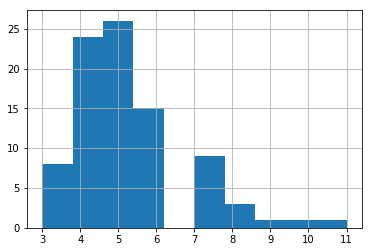

Mean first name length: 5.193181818181818


In [26]:
# Plotting the data. 
# Create a histogram of the distribution of first names 
# (from the previous question). 
# Hint: series.plot(kind="hist")
# What is the average name length? 
# Is it heavy tailed (answer this to the best of your knowledge)? 


# Answer 
import matplotlib.pyplot as plt
import numpy as np
# distribution of count of first names - not much to this
fsname_df['firstName'].value_counts().plot(kind="hist") # or .hist()
plt.show()

# distribution of first name lengths - leave 
fsname_df['firstName'].str.len().hist()
plt.show()

print('Mean first name length:', fsname_df['firstName'].str.len().mean())

# Reviewer's comments
